## 지수 병합

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

cpi_df = pd.read_csv('./data/소비자물가지수.csv', encoding='CP949')
rsi_df = pd.read_csv('./data/소매판매지수.csv')
mir_df = pd.read_csv('./data/시장금리.csv', encoding='CP949')

### 소비자물가지수 전처리

In [2]:
cpi_df

,시점,전국
0,2012.11,92.011
1,2012.12,92.175
2,2013.01,92.728
3,2013.02,93.038
4,2013.03,92.952
...,...,...
111,2022.02,105.300
112,2022.03,106.060
113,2022.04,106.850
114,2022.05,107.560


In [3]:
cpi_df["시점"] = cpi_df["시점"].astype(str)                                                                 # 데이터 타입 str로 변경
cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format='%Y.%m')                                             # 데이터 타입 datetime으로 변경
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y%m')                                                         # datetime 형식 설정
cpi_df.rename(columns={"시점":"날짜"}, inplace=True)                                                       # 컬럼명 변경
cpi_df.rename(columns={"전국":"소비자물가지수"}, inplace=True)                                              # 컬럼명 변경
cpi_df.set_index("날짜", inplace=True)                                                                     # 날짜 컬럼 인덱스 설정
cpi_df = cpi_df.iloc[:-4]
cpi_df

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_19541/3175797114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.


,소비자물가지수
날짜,
201211,92.011
201212,92.175
201301,92.728
201302,93.038
201303,92.952
...,...
202110,103.350
202111,103.870
202112,104.040


### 소매판매지수 전처리

In [4]:
rsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             114 non-null    object 
 1   불변_총지수         114 non-null    float64
 2   불변_총지수(승용차제외)  114 non-null    float64
 3   불변_내구재         114 non-null    float64
 4   불변_준내구재        114 non-null    float64
 5   불변_비내구재        114 non-null    float64
 6   계절_총지수         114 non-null    float64
 7   계절_총지수(승용차제외)  114 non-null    float64
 8   계절_내구재         114 non-null    float64
 9   계절_준내구재        114 non-null    float64
 10  계절_비내구재        114 non-null    float64
 11  불변_인터넷쇼핑       114 non-null    float64
 12  불변_홈쇼핑         114 non-null    float64
 13  불변_방문및배달소매점    114 non-null    float64
dtypes: float64(13), object(1)
memory usage: 12.6+ KB


In [5]:
rsi_df = rsi_df[["날짜", "불변_총지수"]]
rsi_df["날짜"] = pd.to_datetime(rsi_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
rsi_df["날짜"] = rsi_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
rsi_df.set_index("날짜", inplace=True)                              # 날짜 컬럼 인덱스 설정
rsi_df.rename(columns={"불변_총지수":"소매판매지수"}, inplace=True)  # 컬럼명 변경
rsi_df = rsi_df.iloc[:-2]
rsi_df

,소매판매지수
날짜,
201211,97.5
201212,99.8
201301,91.2
201302,86.8
201303,93.6
...,...
202110,125.0
202111,124.7
202112,127.2


### 시장금리 전처리

In [6]:
mir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 115 entries, Unnamed: 0 to 202204월
dtypes: float64(114), object(1)
memory usage: 8.2+ KB


In [7]:
mir_df = mir_df.transpose()
mir_df = mir_df.rename(columns=mir_df.iloc[0])
mir_df = mir_df.iloc[1:-2, :7]                
mir_df

,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리
201211월,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212월,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301월,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302월,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303월,2.6,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...
202110월,1.84,2.15,2.4,2.3,1.08,0.74,0.75
202111월,1.95,2.17,2.36,2.49,1.17,0.8,1.0
202112월,1.8,1.98,2.19,2.41,1.27,1.01,1.0
202201월,2.06,2.28,2.49,2.63,1.39,1.19,1.25


In [8]:
mir_df.reset_index(inplace=True)                                        # 인덱스 재설정
mir_df["index"] = pd.to_datetime(mir_df["index"], format='%Y%m월')      # 데이터 타입 datetime으로 변경
mir_df["index"] = mir_df["index"].dt.strftime('%Y%m')                   # datetime 형식 설정
mir_df.rename(columns={"index":"날짜"}, inplace=True)                   # 컬럼명 변경
mir_df.set_index("날짜", inplace=True)                                  # 날짜 컬럼 인덱스 설정
mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거
mir_df.head()

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_19541/1137828608.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거


,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,
201211,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,2.6,2.69,2.91,2.95,2.81,2.74,2.75


In [9]:
indexes_df = pd.merge(cpi_df, rsi_df, how="left", left_index=True, right_index=True)
indexes_df = pd.merge(indexes_df, mir_df, how="left", left_index=True, right_index=True)
indexes_df.drop_duplicates(inplace=True)
indexes_df

,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,
201211,92.011,97.5,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,92.175,99.8,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,92.728,91.2,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,93.038,86.8,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,92.952,93.6,2.6,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...,...,...
202110,103.350,125.0,1.84,2.15,2.4,2.3,1.08,0.74,0.75
202111,103.870,124.7,1.95,2.17,2.36,2.49,1.17,0.8,1.0
202112,104.040,127.2,1.8,1.98,2.19,2.41,1.27,1.01,1.0


### 카드 소비 전처리

In [10]:
card_df = pd.read_excel('/Users/ijunhui/Downloads/ubion/Project1-다줘페이/data/work file_신용카드_분석_컬럼 분리.xlsx', sheet_name='일일 평균 신용카드')
card_df = card_df.drop('일수', axis = 1)
card_df

,날짜,합계,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,종합병원,일반병의원/기타의료기관,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인및전문서비스,금융/보험
0,2012/11,9999.011333,972.215000,159.277667,485.776000,1041.974333,302.517667,765.296000,199.357000,565.939000,641.297667,198.789667,348.339667,89.743667,288.156333,70.666333,1039.920667,840.187000,353.962000
1,2012/12,10017.194194,966.833226,157.914194,455.321613,989.105161,256.978710,704.016774,186.082258,517.934194,740.329032,206.153548,291.311290,97.125806,272.277419,79.177742,1127.598710,837.021613,339.674516
2,2013/01,9572.008710,920.832258,162.089032,384.273548,966.186452,255.210645,798.916129,210.822581,588.093548,511.525806,218.522258,258.110000,90.403226,283.121935,79.291290,1027.478387,983.820000,336.193226
3,2013/02,9548.782857,878.453929,196.795714,396.239643,974.585000,275.823929,766.754643,200.041071,566.713571,587.617857,207.593929,242.864643,89.367143,301.121786,65.062500,962.792143,898.198929,339.607143
4,2013/03,9536.780000,861.428387,154.043548,423.443548,979.064839,316.493226,753.370000,196.594839,556.775161,649.399677,196.104839,297.237097,118.750000,290.206774,61.232581,1041.879355,824.845484,330.772258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021/12,17417.260645,4258.267742,323.044839,349.118710,969.116774,371.913871,1320.977742,262.184194,1058.793871,966.456774,200.281290,314.451935,95.996774,347.178710,88.156129,1433.026129,1943.300968,777.822581
110,2022/01,17593.384516,4245.859355,414.706452,315.169032,950.493548,414.118710,1349.619677,260.785806,1088.833871,750.398387,207.233548,274.594194,91.136452,358.386129,84.651935,1346.140000,2324.192581,723.731935
111,2022/02,16796.288571,4251.048929,285.238929,283.359286,940.046429,424.111786,1304.308929,236.276786,1068.032143,829.146786,192.837857,280.063214,84.367143,364.047500,87.029286,1230.901429,1956.601071,760.856429
112,2022/03,17398.272581,4346.837742,286.993548,316.113548,1021.516129,399.077419,1365.133548,236.337742,1128.795806,840.082581,219.694194,353.645806,106.896452,364.006452,71.713871,1350.865806,1911.241290,811.151935


In [11]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            114 non-null    object 
 1   합계            114 non-null    float64
 2   전자상거래/통신판매    114 non-null    float64
 3   식료품           114 non-null    float64
 4   의류/잡화         114 non-null    float64
 5   연료            114 non-null    float64
 6   가구/가전         114 non-null    float64
 7   의료/보건         114 non-null    float64
 8   종합병원          114 non-null    float64
 9   일반병의원/기타의료기관  114 non-null    float64
 10  자동차           114 non-null    float64
 11  여행/교통         114 non-null    float64
 12  스포츠/오락/여가     114 non-null    float64
 13  서적/문구         114 non-null    float64
 14  교육            114 non-null    float64
 15  숙박            114 non-null    float64
 16  음식점           114 non-null    float64
 17  공과금/개인및전문서비스  114 non-null    float64
 18  금융/보험         114 non-null    

In [12]:
card_df["날짜"] = pd.to_datetime(card_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
card_df["날짜"] = card_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
card_df.set_index("날짜", inplace=True)                               # 날짜 컬럼 인덱스 설정
card_df = card_df.iloc[:-2]

In [13]:
card_df.head()

,합계,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,종합병원,일반병의원/기타의료기관,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인및전문서비스,금융/보험
날짜,,,,,,,,,,,,,,,,,,
201211,9999.011333,972.215000,159.277667,485.776000,1041.974333,302.517667,765.296000,199.357000,565.939000,641.297667,198.789667,348.339667,89.743667,288.156333,70.666333,1039.920667,840.187000,353.962000
201212,10017.194194,966.833226,157.914194,455.321613,989.105161,256.978710,704.016774,186.082258,517.934194,740.329032,206.153548,291.311290,97.125806,272.277419,79.177742,1127.598710,837.021613,339.674516
201301,9572.008710,920.832258,162.089032,384.273548,966.186452,255.210645,798.916129,210.822581,588.093548,511.525806,218.522258,258.110000,90.403226,283.121935,79.291290,1027.478387,983.820000,336.193226
201302,9548.782857,878.453929,196.795714,396.239643,974.585000,275.823929,766.754643,200.041071,566.713571,587.617857,207.593929,242.864643,89.367143,301.121786,65.062500,962.792143,898.198929,339.607143
201303,9536.780000,861.428387,154.043548,423.443548,979.064839,316.493226,753.370000,196.594839,556.775161,649.399677,196.104839,297.237097,118.750000,290.206774,61.232581,1041.879355,824.845484,330.772258


In [14]:
card_df.columns

Index(['합계', '전자상거래/통신판매', '식료품', '의류/잡화', '연료', '가구/가전', '의료/보건', '종합병원',
       '일반병의원/기타의료기관', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육', '숙박', '음식점',
       '공과금/개인및전문서비스', '금융/보험'],
      dtype='object')

1. 온/오프라인 구분
온라인: 전자상거래/통신판매
오프라인 : 그 외 전체
2. 소모품 구분
내구재 : 자동차, 가구/가전
준내구재 : 의류/잡화, 스포츠/오락/여가
비내구재 : 식료품, 연료
3. 서비스 상품 구분
전국_여행/교통
전국_ 숙박
전국_ 음식점
전국_공과금/개인 및 전문 서비스
전국_금융/보험
교육/서적/문구 (신규)
전국_의료/보건

In [15]:
# 사용할 컬럼(카테고리) 추출

category_df = card_df[['전자상거래/통신판매', '가구/가전', '의류/잡화', '스포츠/오락/여가', '식료품', '연료', 
                       '여행/교통', '숙박', '음식점', '서적/문구', '교육', '의료/보건', '자동차', '공과금/개인및전문서비스', 
                       '금융/보험']]
category_df = pd.DataFrame(category_df)
category_df

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험
날짜,,,,,,,,,,,,,,,
201211,972.215000,302.517667,485.776000,348.339667,159.277667,1041.974333,198.789667,70.666333,1039.920667,89.743667,288.156333,765.296000,641.297667,840.187000,353.962000
201212,966.833226,256.978710,455.321613,291.311290,157.914194,989.105161,206.153548,79.177742,1127.598710,97.125806,272.277419,704.016774,740.329032,837.021613,339.674516
201301,920.832258,255.210645,384.273548,258.110000,162.089032,966.186452,218.522258,79.291290,1027.478387,90.403226,283.121935,798.916129,511.525806,983.820000,336.193226
201302,878.453929,275.823929,396.239643,242.864643,196.795714,974.585000,207.593929,65.062500,962.792143,89.367143,301.121786,766.754643,587.617857,898.198929,339.607143
201303,861.428387,316.493226,423.443548,297.237097,154.043548,979.064839,196.104839,61.232581,1041.879355,118.750000,290.206774,753.370000,649.399677,824.845484,330.772258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110,4031.831290,421.563871,390.360645,422.315161,315.459677,944.520000,225.157097,84.818387,1537.575161,85.580323,351.939677,1301.097419,889.550323,1867.243548,732.397742
202111,4329.658333,433.740667,379.951333,411.269000,325.072667,1002.495333,257.330667,91.265333,1619.712333,83.671667,344.884000,1293.284333,954.176667,1846.859667,762.998000
202112,4258.267742,371.913871,349.118710,314.451935,323.044839,969.116774,200.281290,88.156129,1433.026129,95.996774,347.178710,1320.977742,966.456774,1943.300968,777.822581


In [16]:
# 상품 카테고리와 지수 병합

category_df = pd.merge(category_df, indexes_df, how="left", left_index=True, right_index=True)
category_df.head()

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,,,,,,,,,,,,,,,,
201211,972.215000,302.517667,485.776000,348.339667,159.277667,1041.974333,198.789667,70.666333,1039.920667,89.743667,288.156333,765.296000,641.297667,840.187000,353.962000,92.011,97.5,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,966.833226,256.978710,455.321613,291.311290,157.914194,989.105161,206.153548,79.177742,1127.598710,97.125806,272.277419,704.016774,740.329032,837.021613,339.674516,92.175,99.8,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,920.832258,255.210645,384.273548,258.110000,162.089032,966.186452,218.522258,79.291290,1027.478387,90.403226,283.121935,798.916129,511.525806,983.820000,336.193226,92.728,91.2,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,878.453929,275.823929,396.239643,242.864643,196.795714,974.585000,207.593929,65.062500,962.792143,89.367143,301.121786,766.754643,587.617857,898.198929,339.607143,93.038,86.8,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,861.428387,316.493226,423.443548,297.237097,154.043548,979.064839,196.104839,61.232581,1041.879355,118.750000,290.206774,753.370000,649.399677,824.845484,330.772258,92.952,93.6,2.6,2.69,2.91,2.95,2.81,2.74,2.75


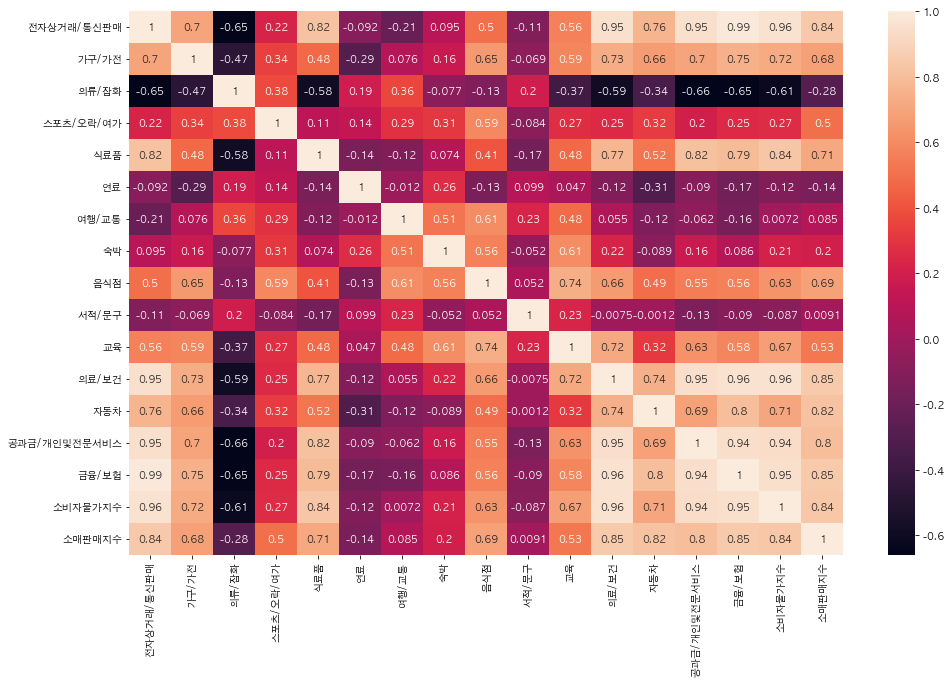

In [17]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(category_df.corr(), annot=True)

plt.show()

In [47]:
# 컬럼별 등락률 계산

col_list = []
col_list.append([col for col in category_df])

df = pd.DataFrame()

for i in col_list:
    df[i] = category_df[i].pct_change()
    
#df = df.iloc[1:]
df.to_csv('./data/전처리+지수.csv')
df

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,,,,,,,,,,,,,,,,
201211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201212,-0.005536,-0.150533,-0.062692,-0.163715,-0.008560,-0.050739,0.037044,0.120445,0.084312,0.082258,-0.055105,-0.080073,0.154423,-0.003767,-0.040364,0.001782,0.023590,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.000000
201301,-0.047579,-0.006880,-0.156039,-0.113972,0.026437,-0.023171,0.059998,0.001434,-0.088791,-0.069215,0.039829,0.134797,-0.309056,0.175382,-0.010249,0.005999,-0.086172,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.000000
201302,-0.046022,0.080770,0.031140,-0.059065,0.214121,0.008692,-0.050010,-0.179450,-0.062956,-0.011461,0.063576,-0.040256,0.148755,-0.087029,0.010155,0.003343,-0.048246,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.000000
201303,-0.019381,0.147447,0.068655,0.223880,-0.217241,0.004597,-0.055344,-0.058865,0.082144,0.328788,-0.036248,-0.017456,0.105139,-0.081667,-0.026015,-0.000924,0.078341,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110,0.030831,0.067327,0.161259,0.149657,-0.252290,0.078572,0.154966,0.170436,0.136576,-0.040658,0.010920,0.099542,0.149200,-0.098051,-0.008229,0.001745,0.018745,0.210526,0.201117,0.165049,0.179487,0.102041,-0.038961,0.000000
202111,0.073869,0.028885,-0.026666,-0.026156,0.030473,0.061381,0.142894,0.076009,0.053420,-0.022303,-0.020048,-0.006005,0.072651,-0.010917,0.041781,0.005031,-0.002400,0.059783,0.009302,-0.016667,0.082609,0.083333,0.081081,0.333333
202112,-0.016489,-0.142543,-0.081149,-0.235411,-0.006238,-0.033295,-0.221697,-0.034068,-0.115259,0.147303,0.006654,0.021413,0.012870,0.052219,0.019429,0.001637,0.020048,-0.076923,-0.087558,-0.072034,-0.032129,0.085470,0.262500,0.000000


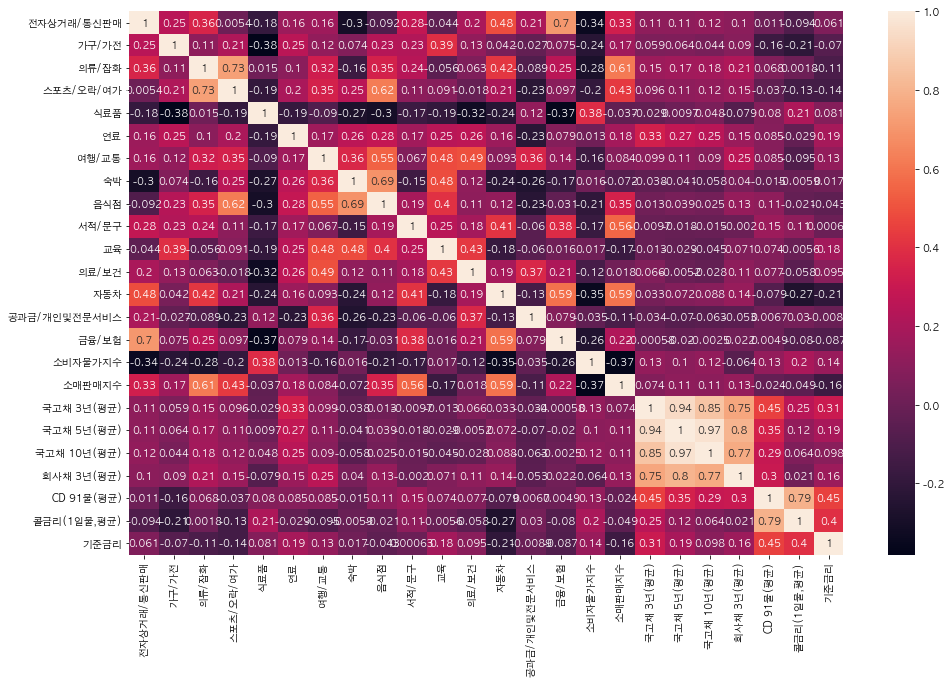

In [49]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True)

plt.show()

### 정규성 검정

In [50]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [51]:
shap_pct(df)

전자상거래/통신판매 의 pvalue: 1.0
가구/가전 의 pvalue: 1.0
의류/잡화 의 pvalue: 1.0
스포츠/오락/여가 의 pvalue: 1.0
식료품 의 pvalue: 1.0
연료 의 pvalue: 1.0
여행/교통 의 pvalue: 1.0
숙박 의 pvalue: 1.0
음식점 의 pvalue: 1.0
서적/문구 의 pvalue: 1.0
교육 의 pvalue: 1.0
의료/보건 의 pvalue: 1.0
자동차 의 pvalue: 1.0
공과금/개인및전문서비스 의 pvalue: 1.0
금융/보험 의 pvalue: 1.0
소비자물가지수 의 pvalue: 1.0
소매판매지수 의 pvalue: 1.0
국고채 3년(평균) 의 pvalue: 1.0
국고채 5년(평균) 의 pvalue: 1.0
국고채 10년(평균) 의 pvalue: 1.0
회사채 3년(평균) 의 pvalue: 1.0
CD 91물(평균) 의 pvalue: 1.0
콜금리(1일물,평균) 의 pvalue: 1.0
기준금리 의 pvalue: 1.0


In [52]:
tem = pd.read_excel('./data/기온.xls')
tem['날짜'] = pd.to_datetime(tem['날짜'], format='%Y-%m')
tem['날짜'] = tem['날짜'].dt.strftime('%Y%m')
tem.rename(columns={"평균기온(℃)" : "평균기온"}, inplace=True)
tem.rename(columns={"평균최고기온(℃)" : "평균최고기온"}, inplace=True)
tem.rename(columns={"평균최저기온(℃)" : "평균최저기온"}, inplace=True)

tem = tem[['날짜', '평균기온', '평균최고기온', '평균최저기온']]

tem.set_index("날짜", inplace=True)         
tem

,평균기온,평균최고기온,평균최저기온
날짜,,,
201211,5.5,9.5,1.8
201212,-4.1,-0.5,-7.4
201301,-3.4,0.3,-6.6
201302,-1.2,2.8,-4.9
201303,5.1,10.8,0.7
...,...,...,...
202110,15.6,20.5,11.6
202111,8.2,13.1,4.0
202112,0.6,5.1,-3.5


In [53]:
df['평균기온_등락률'] = tem['평균기온']
df['평균최고기온_등락률'] = tem['평균최고기온']
df['평균최저기온_등락률'] = tem['평균최저기온']
df

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,평균기온_등락률,평균최고기온_등락률,평균최저기온_등락률
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,
201211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,9.5,1.8
201212,-0.005536,-0.150533,-0.062692,-0.163715,-0.008560,-0.050739,0.037044,0.120445,0.084312,0.082258,-0.055105,-0.080073,0.154423,-0.003767,-0.040364,0.001782,0.023590,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.000000,-4.1,-0.5,-7.4
201301,-0.047579,-0.006880,-0.156039,-0.113972,0.026437,-0.023171,0.059998,0.001434,-0.088791,-0.069215,0.039829,0.134797,-0.309056,0.175382,-0.010249,0.005999,-0.086172,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.000000,-3.4,0.3,-6.6
201302,-0.046022,0.080770,0.031140,-0.059065,0.214121,0.008692,-0.050010,-0.179450,-0.062956,-0.011461,0.063576,-0.040256,0.148755,-0.087029,0.010155,0.003343,-0.048246,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.000000,-1.2,2.8,-4.9
201303,-0.019381,0.147447,0.068655,0.223880,-0.217241,0.004597,-0.055344,-0.058865,0.082144,0.328788,-0.036248,-0.017456,0.105139,-0.081667,-0.026015,-0.000924,0.078341,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.000000,5.1,10.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110,0.030831,0.067327,0.161259,0.149657,-0.252290,0.078572,0.154966,0.170436,0.136576,-0.040658,0.010920,0.099542,0.149200,-0.098051,-0.008229,0.001745,0.018745,0.210526,0.201117,0.165049,0.179487,0.102041,-0.038961,0.000000,15.6,20.5,11.6
202111,0.073869,0.028885,-0.026666,-0.026156,0.030473,0.061381,0.142894,0.076009,0.053420,-0.022303,-0.020048,-0.006005,0.072651,-0.010917,0.041781,0.005031,-0.002400,0.059783,0.009302,-0.016667,0.082609,0.083333,0.081081,0.333333,8.2,13.1,4.0
202112,-0.016489,-0.142543,-0.081149,-0.235411,-0.006238,-0.033295,-0.221697,-0.034068,-0.115259,0.147303,0.006654,0.021413,0.012870,0.052219,0.019429,0.001637,0.020048,-0.076923,-0.087558,-0.072034,-0.032129,0.085470,0.262500,0.000000,0.6,5.1,-3.5


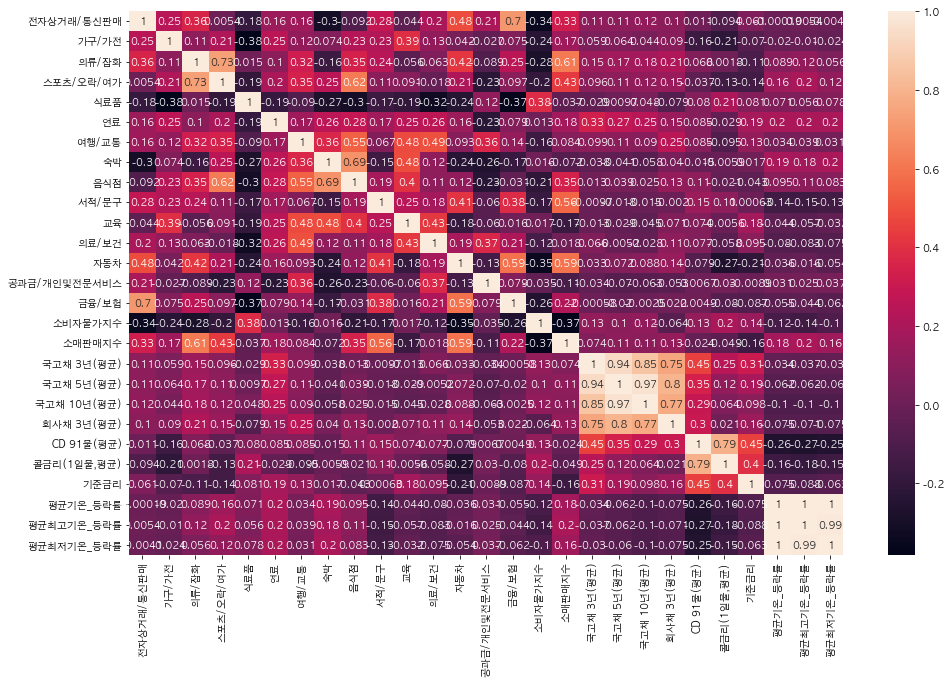

In [54]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True)

plt.show()

In [55]:
category_df['평균기온'] = tem['평균기온']
category_df['평균최고기온'] = tem['평균최고기온']
category_df['평균최저기온'] = tem['평균최저기온']

In [56]:
category_df

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,평균기온,평균최고기온,평균최저기온
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,
201211,972.215000,302.517667,485.776000,348.339667,159.277667,1041.974333,198.789667,70.666333,1039.920667,89.743667,288.156333,765.296000,641.297667,840.187000,353.962000,92.011,97.5,2.8,2.87,2.99,3.32,2.85,2.75,2.75,5.5,9.5,1.8
201212,966.833226,256.978710,455.321613,291.311290,157.914194,989.105161,206.153548,79.177742,1127.598710,97.125806,272.277419,704.016774,740.329032,837.021613,339.674516,92.175,99.8,2.85,2.98,3.13,3.3,2.88,2.75,2.75,-4.1,-0.5,-7.4
201301,920.832258,255.210645,384.273548,258.110000,162.089032,966.186452,218.522258,79.291290,1027.478387,90.403226,283.121935,798.916129,511.525806,983.820000,336.193226,92.728,91.2,2.75,2.86,3.05,3.2,2.86,2.76,2.75,-3.4,0.3,-6.6
201302,878.453929,275.823929,396.239643,242.864643,196.795714,974.585000,207.593929,65.062500,962.792143,89.367143,301.121786,766.754643,587.617857,898.198929,339.607143,93.038,86.8,2.7,2.83,3.04,3.06,2.83,2.75,2.75,-1.2,2.8,-4.9
201303,861.428387,316.493226,423.443548,297.237097,154.043548,979.064839,196.104839,61.232581,1041.879355,118.750000,290.206774,753.370000,649.399677,824.845484,330.772258,92.952,93.6,2.6,2.69,2.91,2.95,2.81,2.74,2.75,5.1,10.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110,4031.831290,421.563871,390.360645,422.315161,315.459677,944.520000,225.157097,84.818387,1537.575161,85.580323,351.939677,1301.097419,889.550323,1867.243548,732.397742,103.350,125.0,1.84,2.15,2.4,2.3,1.08,0.74,0.75,15.6,20.5,11.6
202111,4329.658333,433.740667,379.951333,411.269000,325.072667,1002.495333,257.330667,91.265333,1619.712333,83.671667,344.884000,1293.284333,954.176667,1846.859667,762.998000,103.870,124.7,1.95,2.17,2.36,2.49,1.17,0.8,1.0,8.2,13.1,4.0
202112,4258.267742,371.913871,349.118710,314.451935,323.044839,969.116774,200.281290,88.156129,1433.026129,95.996774,347.178710,1320.977742,966.456774,1943.300968,777.822581,104.040,127.2,1.8,1.98,2.19,2.41,1.27,1.01,1.0,0.6,5.1,-3.5


In [32]:
df



,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,기타,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,평균기온_등락률,평균최고기온_등락률,평균최저기온_등락률
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201212,0.027613,-0.122218,-0.031449,-0.135839,0.024488,-0.019097,0.071612,0.157793,0.120456,0.118333,-0.023609,-0.049408,0.192904,0.029440,-0.008377,0.064302,0.001782,0.023590,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.000000,-4.1,-0.5,-7.4
201301,-0.047579,-0.006880,-0.156039,-0.113972,0.026437,-0.023171,0.059998,0.001434,-0.088791,-0.069215,0.039829,0.134797,-0.309056,0.175382,-0.010249,0.006943,0.005999,-0.086172,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.000000,-3.4,0.3,-6.6
201302,-0.138342,-0.023821,-0.068648,-0.150124,0.096626,-0.088923,-0.141945,-0.258858,-0.153638,-0.107126,-0.039350,-0.133135,0.037585,-0.175381,-0.087602,-0.085328,0.003343,-0.048246,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.000000,-1.2,2.8,-4.9
201303,0.085685,0.270387,0.183154,0.355010,-0.133374,0.112232,0.045869,0.041971,0.198088,0.471158,0.067011,0.087816,0.223547,0.016726,0.078341,0.094873,-0.000924,0.078341,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.000000,5.1,10.8,0.7
201304,0.045225,-0.081842,-0.009763,0.028387,0.001931,-0.027114,0.060437,0.008076,0.001713,-0.204835,-0.138564,-0.038601,0.004995,0.027424,0.025264,0.010427,-0.001388,-0.018162,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.000000,10.0,15.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110,0.065192,0.102904,0.199967,0.187979,-0.227367,0.114525,0.193465,0.209451,0.174462,-0.008680,0.044617,0.136194,0.187507,-0.067986,0.024830,0.017583,0.001745,0.018745,0.210526,0.201117,0.165049,0.179487,0.102041,-0.038961,0.000000,15.6,20.5,11.6
202111,0.039228,-0.004305,-0.058064,-0.057571,-0.002768,0.027143,0.106026,0.041299,0.019439,-0.053841,-0.051659,-0.038069,0.038049,-0.042822,0.008175,0.002600,0.005031,-0.002400,0.059783,0.009302,-0.016667,0.082609,0.083333,0.081081,0.333333,8.2,13.1,4.0
202112,0.016295,-0.113961,-0.050521,-0.209924,0.026887,-0.001072,-0.195753,-0.001870,-0.085767,0.185547,0.040209,0.055460,0.046632,0.087293,0.053410,0.033420,0.001637,0.020048,-0.076923,-0.087558,-0.072034,-0.032129,0.085470,0.262500,0.000000,0.6,5.1,-3.5


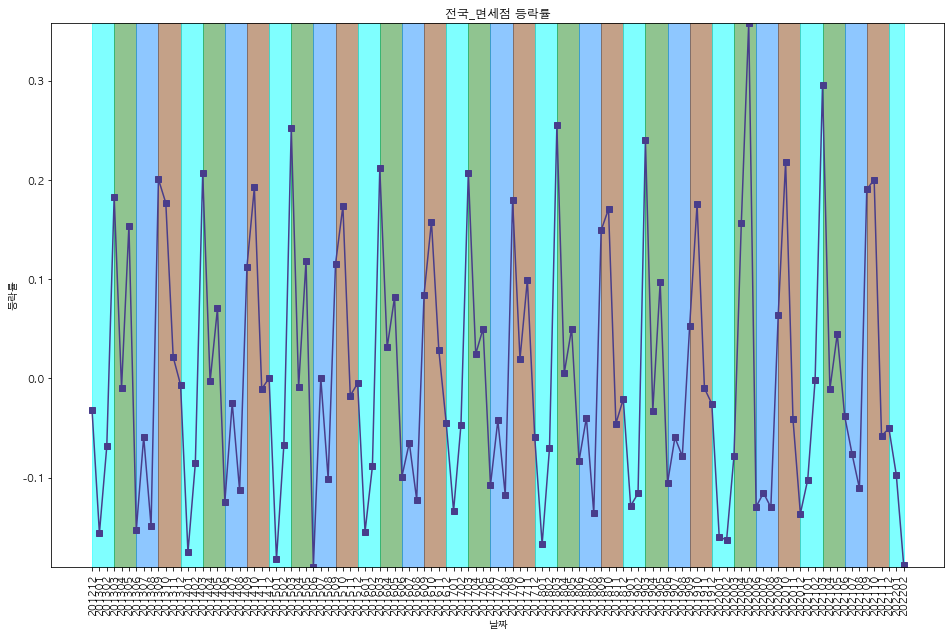

In [33]:
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

x = df.index
y = df["의류/잡화"]

ymin, ymax = plt.ylim([df["의류/잡화"].min(), df["의류/잡화"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df["의류/잡화"], '-s', color='darkslateblue')

plt.title("전국_면세점 등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

In [34]:
df

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,기타,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,평균기온_등락률,평균최고기온_등락률,평균최저기온_등락률
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201212,0.027613,-0.122218,-0.031449,-0.135839,0.024488,-0.019097,0.071612,0.157793,0.120456,0.118333,-0.023609,-0.049408,0.192904,0.029440,-0.008377,0.064302,0.001782,0.023590,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.000000,-4.1,-0.5,-7.4
201301,-0.047579,-0.006880,-0.156039,-0.113972,0.026437,-0.023171,0.059998,0.001434,-0.088791,-0.069215,0.039829,0.134797,-0.309056,0.175382,-0.010249,0.006943,0.005999,-0.086172,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.000000,-3.4,0.3,-6.6
201302,-0.138342,-0.023821,-0.068648,-0.150124,0.096626,-0.088923,-0.141945,-0.258858,-0.153638,-0.107126,-0.039350,-0.133135,0.037585,-0.175381,-0.087602,-0.085328,0.003343,-0.048246,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.000000,-1.2,2.8,-4.9
201303,0.085685,0.270387,0.183154,0.355010,-0.133374,0.112232,0.045869,0.041971,0.198088,0.471158,0.067011,0.087816,0.223547,0.016726,0.078341,0.094873,-0.000924,0.078341,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.000000,5.1,10.8,0.7
201304,0.045225,-0.081842,-0.009763,0.028387,0.001931,-0.027114,0.060437,0.008076,0.001713,-0.204835,-0.138564,-0.038601,0.004995,0.027424,0.025264,0.010427,-0.001388,-0.018162,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.000000,10.0,15.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110,0.065192,0.102904,0.199967,0.187979,-0.227367,0.114525,0.193465,0.209451,0.174462,-0.008680,0.044617,0.136194,0.187507,-0.067986,0.024830,0.017583,0.001745,0.018745,0.210526,0.201117,0.165049,0.179487,0.102041,-0.038961,0.000000,15.6,20.5,11.6
202111,0.039228,-0.004305,-0.058064,-0.057571,-0.002768,0.027143,0.106026,0.041299,0.019439,-0.053841,-0.051659,-0.038069,0.038049,-0.042822,0.008175,0.002600,0.005031,-0.002400,0.059783,0.009302,-0.016667,0.082609,0.083333,0.081081,0.333333,8.2,13.1,4.0
202112,0.016295,-0.113961,-0.050521,-0.209924,0.026887,-0.001072,-0.195753,-0.001870,-0.085767,0.185547,0.040209,0.055460,0.046632,0.087293,0.053410,0.033420,0.001637,0.020048,-0.076923,-0.087558,-0.072034,-0.032129,0.085470,0.262500,0.000000,0.6,5.1,-3.5


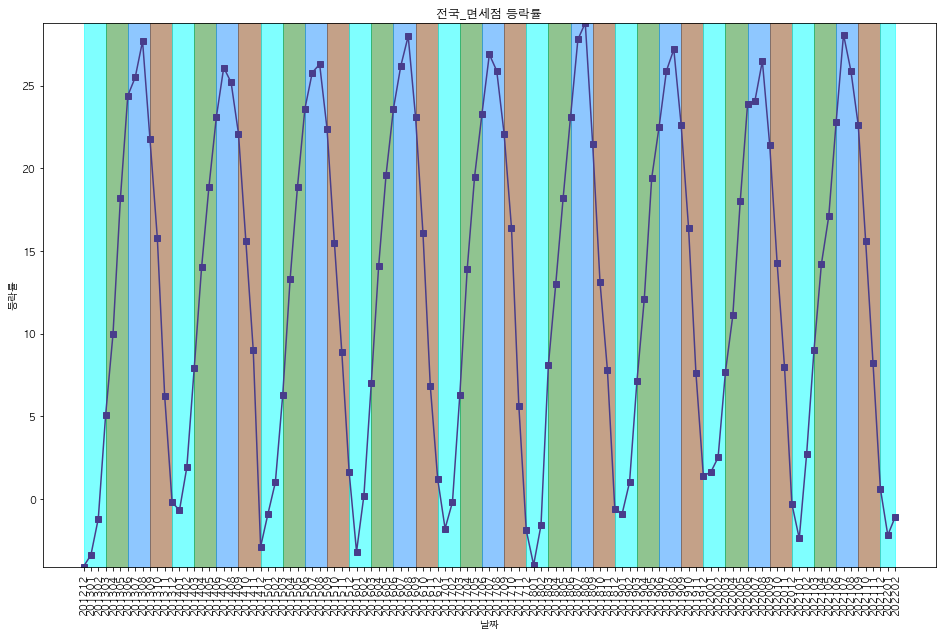

In [35]:
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

x = df.index
y = df["평균기온_등락률"]

ymin, ymax = plt.ylim([df["평균기온_등락률"].min(), df["평균기온_등락률"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df["평균기온_등락률"], '-s', color='darkslateblue')

plt.title("전국_면세점 등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

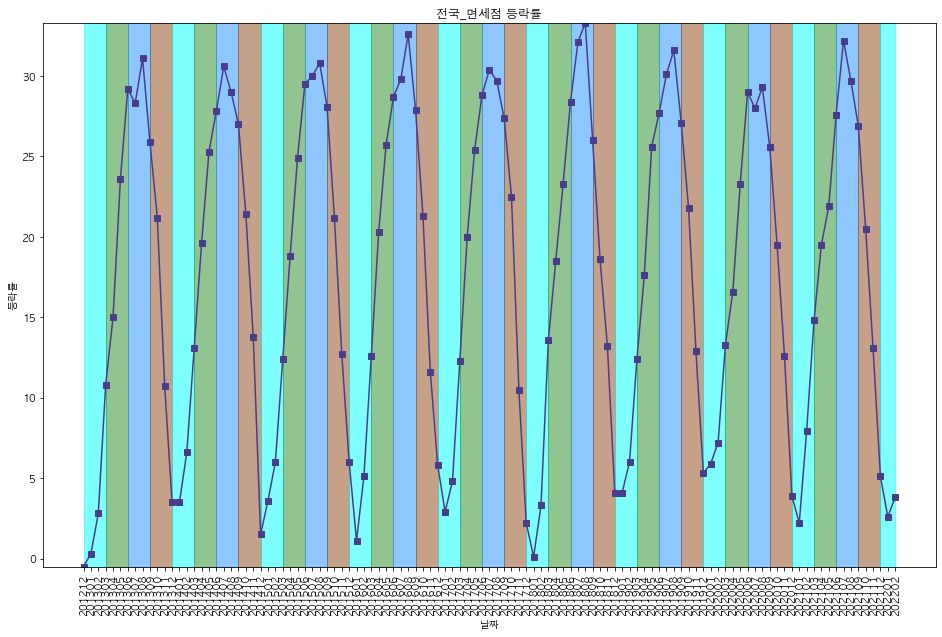

In [36]:
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

x = df.index
y = df["평균최고기온_등락률"]

ymin, ymax = plt.ylim([df["평균최고기온_등락률"].min(), df["평균최고기온_등락률"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df["평균최고기온_등락률"], '-s', color='darkslateblue')

plt.title("전국_면세점 등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

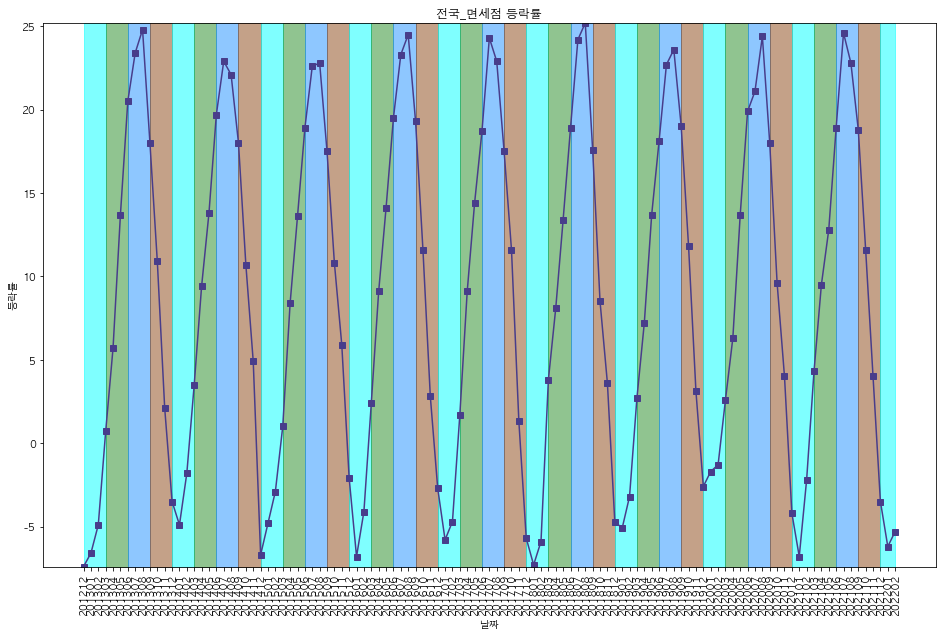

In [37]:
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

x = df.index
y = df["평균최저기온_등락률"]

ymin, ymax = plt.ylim([df["평균최저기온_등락률"].min(), df["평균최저기온_등락률"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df["평균최저기온_등락률"], '-s', color='darkslateblue')

plt.title("전국_면세점 등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

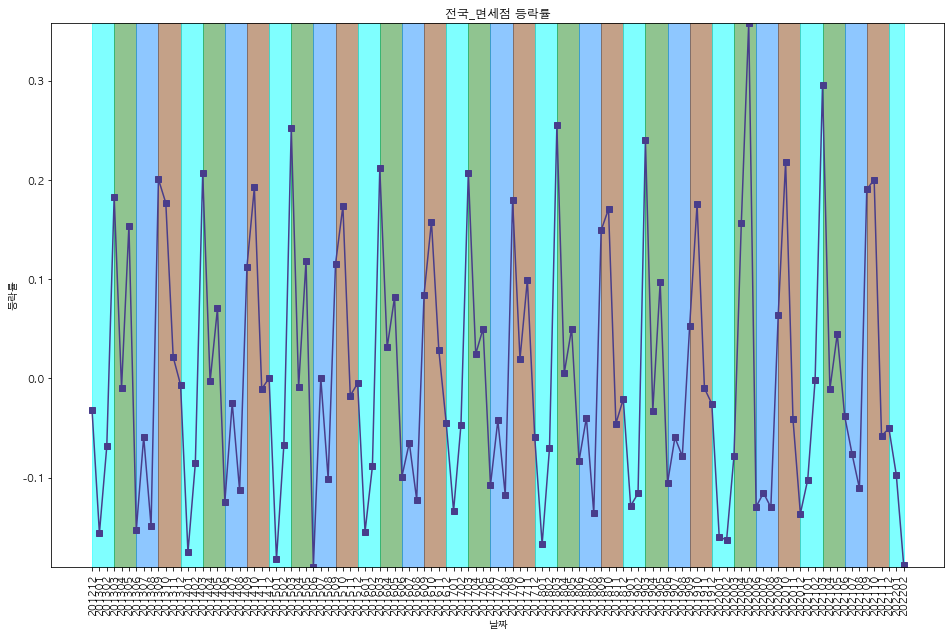

In [38]:
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

x = df.index
y = df["의류/잡화"]

ymin, ymax = plt.ylim([df["의류/잡화"].min(), df["의류/잡화"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:], ymin, ymax, color='saddlebrown', alpha=0.5)

plt.plot(df["의류/잡화"], '-s', color='darkslateblue')

plt.title("전국_면세점 등락률")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 